# MNIST Dense Neural Network Example

Build a 2-hidden layers fully connected neural network with TensorFlow.


Heavily modified example based on  code  from Aymeric Damien, https://github.com/aymericdamien/TensorFlow-Examples/

## Neural Network Overview

<img src="http://cs231n.github.io/assets/nn1/neural_net2.jpeg" alt="nn" style="width: 400px;"/>


## Preliminaries

### Imports

In [1]:
import pickle
import shutil

import numpy as np
import pandas as pd
import tensorflow as tf
import tensorflow.keras as keras

import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

%matplotlib inline

import sys
sys.path.append("../..")
import E4525_ML.mnist as mnist

## Data

In [2]:
raw_data_dir="../../raw/MNIST"
data_dir="../../data/digits"
model_dir="../../data/models/tf/DNN_MNIST"

In [3]:
images_filename=raw_data_dir+"/train-images-idx3-ubyte.gz"
labels_filename=raw_data_dir+"/train-labels-idx1-ubyte.gz"

test_images_filename=raw_data_dir+"/t10k-images-idx3-ubyte.gz"
test_labels_filename=raw_data_dir+"/t10k-labels-idx1-ubyte.gz"

images=mnist.read_images(images_filename)
labels=mnist.read_labels(labels_filename)

test_images=mnist.read_images(test_images_filename)
test_labels=mnist.read_labels(test_labels_filename)
    
print(images.shape,labels.shape,test_images.shape,test_labels.shape)

(60000, 28, 28) (60000,) (10000, 28, 28) (10000,)


In [4]:
images_train,images_val,labels_train,labels_val=train_test_split(images,labels,test_size=0.2)
print(images_train.shape,images_val.shape)

(48000, 28, 28) (12000, 28, 28)


## Define Dense Neural Network

The following class define's the **logit** function $\eta(x)$ as a 2 hidden layer, dense, neural network with `Relu` activation.

In [5]:
def build_model(hidden1,hidden2):
    model=keras.Sequential([
        keras.layers.Flatten(input_shape=(28,28)),
        keras.layers.Dense(hidden1,activation="relu"),
        keras.layers.Dense(hidden2,activation="relu"),
        keras.layers.Dense(10,activation="softmax")
    ])
    model.compile(optimizer="adam",loss="sparse_categorical_crossentropy",metrics=["accuracy"])
    return model

In [6]:
model0=build_model(32,16)
model0.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 32)                25120     
_________________________________________________________________
dense_1 (Dense)              (None, 16)                528       
_________________________________________________________________
dense_2 (Dense)              (None, 10)                170       
Total params: 25,818
Trainable params: 25,818
Non-trainable params: 0
_________________________________________________________________


In [7]:
result=model0.fit(images_train,labels_train,validation_data=(images_val,labels_val),epochs=20)

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
48000/48000 [==============================] - 3s 56us/step - loss: 0.4195 - acc: 0.8750 - val_loss: 0.2335 - val_acc: 0.9318
Epoch 2/20
48000/48000 [==============================] - 2s 49us/step - loss: 0.1997 - acc: 0.9406 - val_loss: 0.1910 - val_acc: 0.9444
Epoch 3/20
48000/48000 [==============================] - 2s 48us/step - loss: 0.1600 - acc: 0.9522 - val_loss: 0.1669 - val_acc: 0.9530
Epoch 4/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.1368 - acc: 0.9594 - val_loss: 0.1624 - val_acc: 0.9528
Epoch 5/20
48000/48000 [==============================] - 2s 44us/step - loss: 0.1202 - acc: 0.9635 - val_loss: 0.1435 - val_acc: 0.9584
Epoch 6/20
48000/48000 [==============================] - 2s 45us/step - loss: 0.1065 - acc: 0.9668 - val_loss: 0.1579 - val_acc: 0.9510
Epoch 7/20
48000/48000 [==============================] - 2s 46us/step - loss: 0.0966 - acc: 0.9697 - val_loss: 0.1383 - val_acc

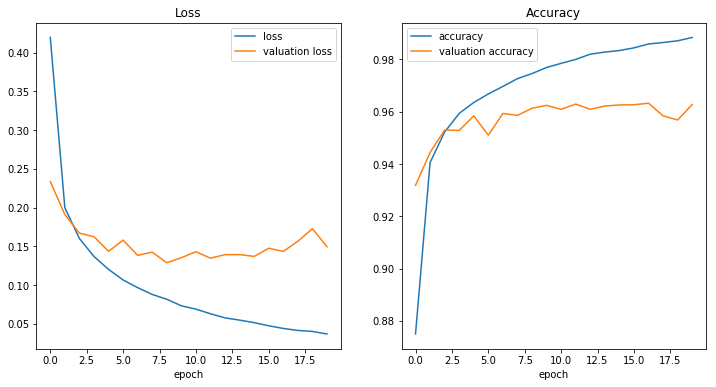

In [8]:
history=result.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [9]:
Y_pred=np.argmax(model0.predict(images_val),axis=1)
np.mean(Y_pred==labels_val)

0.96275

## Hyper-parameter Search

In [10]:
results=[]
for hidden1 in [8,16,32,64,128,256]:
  for hidden2 in [8,32,64,128,256]:
    model0=build_model(hidden1,hidden2)
    model0.fit(images_train,labels_train,validation_data=(images_val,labels_val),epochs=20,verbose=2)
    Y_pred=np.argmax(model0.predict(images_val),axis=1)
    acc=np.mean(Y_pred==labels_val)
    results.append((hidden1,hidden2,acc))
    print(">>>>>",hidden1,hidden2,acc,"<<<<<<<<<")

Train on 48000 samples, validate on 12000 samples
Epoch 1/20
 - 3s - loss: 0.8100 - acc: 0.7576 - val_loss: 0.4165 - val_acc: 0.8840
Epoch 2/20
 - 2s - loss: 0.3776 - acc: 0.8949 - val_loss: 0.3436 - val_acc: 0.9022
Epoch 3/20
 - 2s - loss: 0.3231 - acc: 0.9089 - val_loss: 0.3061 - val_acc: 0.9149
Epoch 4/20
 - 2s - loss: 0.2981 - acc: 0.9156 - val_loss: 0.3032 - val_acc: 0.9117
Epoch 5/20
 - 2s - loss: 0.2828 - acc: 0.9201 - val_loss: 0.2913 - val_acc: 0.9143
Epoch 6/20
 - 2s - loss: 0.2713 - acc: 0.9221 - val_loss: 0.2892 - val_acc: 0.9168
Epoch 7/20
 - 2s - loss: 0.2627 - acc: 0.9248 - val_loss: 0.2786 - val_acc: 0.9203
Epoch 8/20
 - 2s - loss: 0.2563 - acc: 0.9272 - val_loss: 0.2800 - val_acc: 0.9198
Epoch 9/20
 - 2s - loss: 0.2495 - acc: 0.9290 - val_loss: 0.2780 - val_acc: 0.9217
Epoch 10/20
 - 2s - loss: 0.2447 - acc: 0.9300 - val_loss: 0.2762 - val_acc: 0.9187
Epoch 11/20
 - 2s - loss: 0.2403 - acc: 0.9308 - val_loss: 0.2731 - val_acc: 0.9223
Epoch 12/20
 - 2s - loss: 0.2370 - 

In [11]:
data=pd.DataFrame(results,columns=["layer1","layer2","accuracy"])
pivot=data.pivot('layer1', 'layer2')
pivot

accuracy                                        
layer2       8         32        64        128       256
layer1                                                  
8       0.924000  0.932500  0.941333  0.942417  0.945000
16      0.947417  0.957083  0.958583  0.964500  0.962750
32      0.957167  0.963750  0.964417  0.969250  0.971250
64      0.966833  0.970917  0.970667  0.973333  0.974167
128     0.966000  0.972917  0.977917  0.978417  0.973667
256     0.974083  0.976750  0.980000  0.976250  0.977833

In [12]:
best_idx=data["accuracy"].argmax()
best=data.iloc[best_idx]
hidden1=best["layer1"]
hidden2=best["layer2"]
best

/home/manel/anaconda3/envs/Tensorflow/lib/python3.6/site-packages/ipykernel_launcher.py:1: FutureWarning: 'argmax' is deprecated, use 'idxmax' instead. The behavior of 'argmax'
will be corrected to return the positional maximum in the future.
Use 'series.values.argmax' to get the position of the maximum now.
  """Entry point for launching an IPython kernel.


layer1      256.00
layer2       64.00
accuracy      0.98
Name: 27, dtype: float64

## Test Best Model

In [13]:
model=build_model(hidden1,hidden2)
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten_31 (Flatten)         (None, 784)               0         
_________________________________________________________________
dense_93 (Dense)             (None, 256)               200960    
_________________________________________________________________
dense_94 (Dense)             (None, 64)                16448     
_________________________________________________________________
dense_95 (Dense)             (None, 10)                650       
Total params: 218,058
Trainable params: 218,058
Non-trainable params: 0
_________________________________________________________________


In [14]:
result=model.fit(images,labels,validation_data=(test_images,test_labels),epochs=20)

Train on 60000 samples, validate on 10000 samples
Epoch 1/20
60000/60000 [==============================] - 15s 247us/step - loss: 0.2072 - acc: 0.9385 - val_loss: 0.1097 - val_acc: 0.9660
Epoch 2/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0860 - acc: 0.9733 - val_loss: 0.0753 - val_acc: 0.9765
Epoch 3/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0617 - acc: 0.9800 - val_loss: 0.0764 - val_acc: 0.9781
Epoch 4/20
60000/60000 [==============================] - 11s 179us/step - loss: 0.0447 - acc: 0.9855 - val_loss: 0.0655 - val_acc: 0.9818
Epoch 5/20
60000/60000 [==============================] - 11s 180us/step - loss: 0.0349 - acc: 0.9884 - val_loss: 0.0709 - val_acc: 0.9776
Epoch 6/20
60000/60000 [==============================] - 11s 178us/step - loss: 0.0285 - acc: 0.9906 - val_loss: 0.0683 - val_acc: 0.9817
Epoch 7/20
60000/60000 [==============================] - 11s 181us/step - loss: 0.0245 - acc: 0.9920 - val_loss: 0.

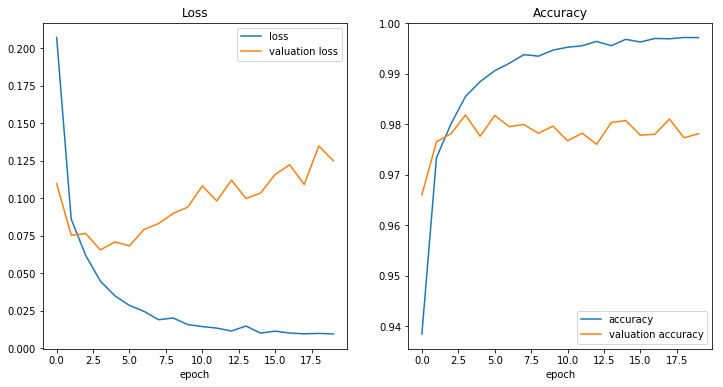

In [15]:
history=result.history
plt.figure(figsize=(12,6))
plt.subplot(1, 2, 1)
plt.plot(history["loss"],label="loss")
plt.plot(history["val_loss"],label="valuation loss")
plt.title('Loss')
plt.xlabel('epoch')
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(history["acc"],label="accuracy")
plt.plot(history["val_acc"],label="valuation accuracy")
plt.title('Accuracy')
plt.xlabel('epoch')
plt.legend()

In [16]:
Y_pred=np.argmax(model.predict(test_images),axis=1)
np.mean(Y_pred==test_labels)

0.9781